SIR Simulation Model for the Spread of Infectious Diseases

In [26]:
import networkx as nx
import numpy as np
import matplotlib
import matplotlib.pylab as plt
import random
import copy
%matplotlib inline

Generate Network:

C:\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


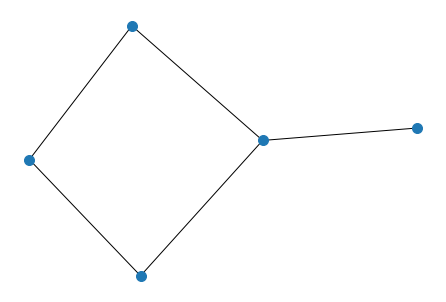

In [2]:
G = nx.Graph()
G.add_edges_from([(0,1),(1,2),(1,3),(2,4),(3,4)])
nx.draw(G,node_size=100,width=1)

Define Simulation Function:

In [53]:
def simulate(G,beta,gamma,z):
    ztemp = copy.deepcopy(z)
    rnd = 0
    S = [len(z)-1]
    I = [1]
    R = [0]
    t = [0]
    #print("z0 = ",z)
    #print("ztemp0 = ",ztemp)
    while 1 in z:
        rnd += 1
        #print("Beginning of round",rnd)
        for edge in G.edges():
            #print("edge = ",edge)
            #print("edge[0] =",edge[0])
            #print("edge[1] =",edge[1])
            #print("z[",edge[0],"] =",z[edge[0]])
            #print("z[",edge[1],"] =",z[edge[1]])
            #print("ztemp[",edge[0],"] =",ztemp[edge[0]])
            #print("ztemp[",edge[1],"] =",ztemp[edge[1]])
            if int(z[edge[0]]) == 1 and int(z[edge[1]]) == 0:
                if random.random() > beta:
                    ztemp[edge[1]] = 1
                    #print("infection spread from node",edge[0],"to",edge[1])
                #else:
                    #print("infection did not spread from node",edge[0],"to",edge[1])
            if int(z[edge[1]]) == 1 and int(z[edge[0]]) == 0:
                if random.random() < beta:
                    ztemp[edge[0]] = 1
                    #print("infection spread from node",edge[1],"to",edge[0])
                #else:
                    #print("infection did not spread from node",edge[1],"to",edge[0])
            #print("z after infections = ",z)
            #print("ztemp after infections = ",ztemp)
        for node in G:
            if z[node] == 1:
                #print("node = ",node)
                if random.random() < gamma:
                    ztemp[node] = 2
                    #print("node",node,"recovered")
                #else:
                    #print("node",node,"did not recover")
        #print("z after recoveries = ",z)
        #print("ztemp after recoveries = ",ztemp)
        z = copy.deepcopy(ztemp)
        S.append(z.count(0))
        I.append(z.count(1))
        R.append(z.count(2))
        t.append(rnd)
    if 1 not in z:
        print("Simulation is complete \nzFinal =",z,"\nS =",S,"\nI =",I,"\nR =",R,"\nt =",t)
        return S,I,R,t

Run Simulation:

In [59]:
z = [0]*5
OL = rnd.randint(0,len(G)-1)
z[OL] = int(1) 
S,I,R,t = simulate(G,0.5,0.25,z)


Simulation is complete 
zFinal = [0, 0, 2, 0, 0] 
S = [4, 4] 
I = [1, 0] 
R = [0, 1] 
t = [0, 1]


Visualize Simulation:

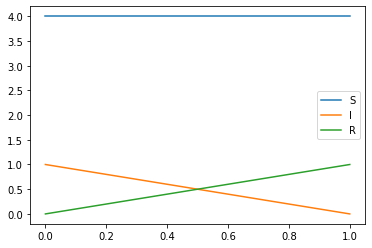

In [60]:
legend = ["S","I","R"]
plt.plot(t,S,label=legend[0])
plt.plot(t,I,label=legend[1])
plt.plot(t,R,label=legend[2])
plt.legend()
plt.show()